In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Housing.csv")

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

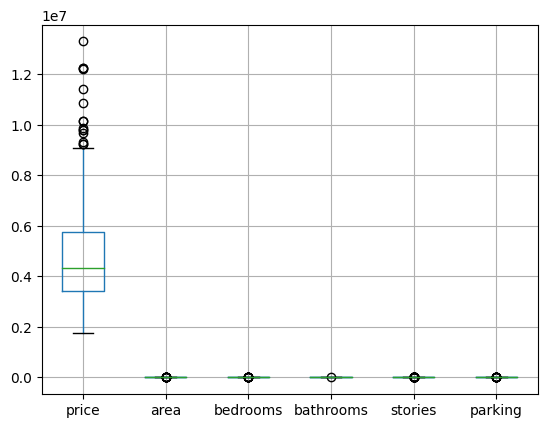

In [9]:
df.boxplot()

In [10]:
Q1 = np.percentile(df['price'],25,interpolation='midpoint')
Q2 = np.percentile(df['price'],50,interpolation='midpoint')
Q3 = np.percentile(df['price'],75,interpolation='midpoint')

print(Q1)
print(Q2)
print(Q3)

IQR = Q3-Q1
IQR

3430000.0
4340000.0
5740000.0


2310000.0

In [11]:
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

In [12]:
OUTLIER=[]
for x in df['price']:
  if((x>upper_limit) or (x<lower_limit)):
    OUTLIER.append(x)
OUTLIER

[13300000,
 12250000,
 12250000,
 12215000,
 11410000,
 10850000,
 10150000,
 10150000,
 9870000,
 9800000,
 9800000,
 9681000,
 9310000,
 9240000,
 9240000]

In [13]:
df1 = df['price']>upper_limit

In [14]:
df.loc[df1]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [15]:
df.loc[df1].index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [16]:
df.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],inplace=True)

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [18]:
df.reset_index(inplace=True)

In [19]:
df.head()

,index,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
1,16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
2,17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
3,18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
4,19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [20]:
df.drop('index',axis=1,inplace=True)

In [21]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
1,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
2,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
3,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
4,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [22]:
# encoding


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
1,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
2,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
3,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
4,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [25]:
df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,yes,no,no,no,semi-furnished
1,yes,yes,yes,no,yes,yes,unfurnished
2,yes,no,no,no,yes,no,furnished
3,yes,yes,no,no,yes,no,furnished
4,yes,no,no,no,yes,yes,semi-furnished
...,...,...,...,...,...,...,...
525,yes,no,yes,no,no,no,unfurnished
526,no,no,no,no,no,no,semi-furnished
527,yes,no,no,no,no,no,unfurnished
528,no,no,no,no,no,no,furnished


In [26]:
for i in ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']:
  df[i]=le.fit_transform(df[i])
df[i]

0      1
1      2
2      0
3      0
4      1
      ..
525    2
526    1
527    2
528    0
529    2
Name: furnishingstatus, Length: 530, dtype: int64

In [27]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


In [28]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.509856,0.332293,0.457962,0.432528,0.310712,0.290195,0.195705,0.082829,0.462342,0.328308,0.292536,-0.303320
area,0.509856,1.000000,0.112056,0.133472,0.063939,0.289321,0.155552,0.037246,0.002533,0.211505,0.344797,0.212723,-0.170043
bedrooms,0.332293,0.112056,1.000000,0.350025,0.404628,-0.024639,0.076559,0.100002,0.029208,0.146859,0.110234,0.066364,-0.110891
bathrooms,0.457962,0.133472,0.350025,1.000000,0.308026,0.023649,0.147393,0.120375,0.040149,0.174966,0.127184,0.032021,-0.145684
stories,0.432528,0.063939,0.404628,0.308026,1.000000,0.116551,0.038356,-0.166370,0.020024,0.281968,0.019222,0.026019,-0.100844
mainroad,0.310712,0.289321,-0.024639,0.023649,0.116551,1.000000,0.091658,0.041974,-0.017305,0.099208,0.197896,0.194901,-0.153407
guestroom,0.290195,0.155552,0.076559,0.147393,0.038356,0.091658,1.000000,0.372114,-0.025219,0.135385,0.030815,0.170439,-0.121165
basement,0.195705,0.037246,0.100002,0.120375,-0.166370,0.041974,0.372114,1.000000,0.000294,0.040937,0.031970,0.228963,-0.104027
hotwaterheating,0.082829,0.002533,0.029208,0.040149,0.020024,-0.017305,-0.025219,0.000294,1.000000,-0.121215,0.051929,-0.047207,-0.022760
airconditioning,0.462342,0.211505,0.146859,0.174966,0.281968,0.099208,0.135385,0.040937,-0.121215,1.000000,0.128370,0.087934,-0.135633


<Axes: >

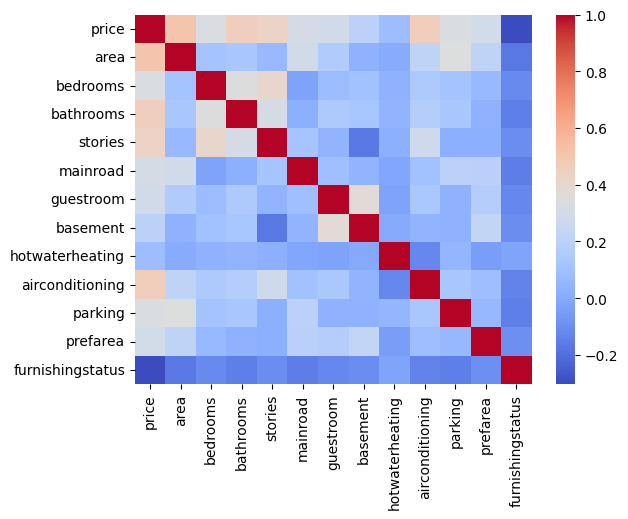

In [29]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [30]:
# minmax

In [31]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


In [32]:
x = df[['price','area']]
y = df.drop(['price','area'],axis=1)

In [33]:
x.head()

,price,area
0,9100000,6000
1,9100000,6600
2,8960000,8500
3,8890000,4600
4,8855000,6420


In [35]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [36]:
newx = minmax.fit_transform(x)

In [37]:
x = pd.DataFrame(newx,columns=['price','area'])

In [38]:
x.head()

,price,area
0,1.000000,0.311828
1,1.000000,0.354839
2,0.980952,0.491039
3,0.971429,0.211470
4,0.966667,0.341935


In [39]:
df = pd.concat([y,x],axis=1)

In [40]:
df

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,area
0,4,1,2,1,0,1,0,0,2,0,1,1.000000,0.311828
1,4,2,2,1,1,1,0,1,1,1,2,1.000000,0.354839
2,3,2,4,1,0,0,0,1,2,0,0,0.980952,0.491039
3,3,2,2,1,1,0,0,1,2,0,0,0.971429,0.211470
4,3,2,2,1,0,0,0,1,1,1,1,0.966667,0.341935
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,2,1,1,1,0,1,0,0,2,0,2,0.009524,0.096774
526,3,1,1,0,0,0,0,0,0,0,1,0.002333,0.053763
527,2,1,1,1,0,0,0,0,0,0,2,0.000000,0.141219
528,3,1,1,0,0,0,0,0,0,0,0,0.000000,0.090323


In [ ]:
#  KNN ALGORITHM

# KNN - CLASSIFICATION

In [48]:
x = df.drop('furnishingstatus',axis=1)
x1 = pd.DataFrame(x)
y = df['furnishingstatus']
y1 = pd.DataFrame(y)

In [49]:
x.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,area
0,4,1,2,1,0,1,0,0,2,0,1.000000,0.311828
1,4,2,2,1,1,1,0,1,1,1,1.000000,0.354839
2,3,2,4,1,0,0,0,1,2,0,0.980952,0.491039
3,3,2,2,1,1,0,0,1,2,0,0.971429,0.211470
4,3,2,2,1,0,0,0,1,1,1,0.966667,0.341935


In [50]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=42)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

metric_k = []

neighbors = np.arange(3,15)

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors = k)
  model = knn.fit(x1_train,y1_train)
  y1_pred = model.predict(x1_test)
  acc = accuracy_score(y1_test,y1_pred)
  metric_k.append(acc)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [52]:
metric_k

[0.3684210526315789,
 0.3609022556390977,
 0.3533834586466165,
 0.37593984962406013,
 0.3684210526315789,
 0.3533834586466165,
 0.39097744360902253,
 0.41353383458646614,
 0.45864661654135336,
 0.44360902255639095,
 0.47368421052631576,
 0.48120300751879697]

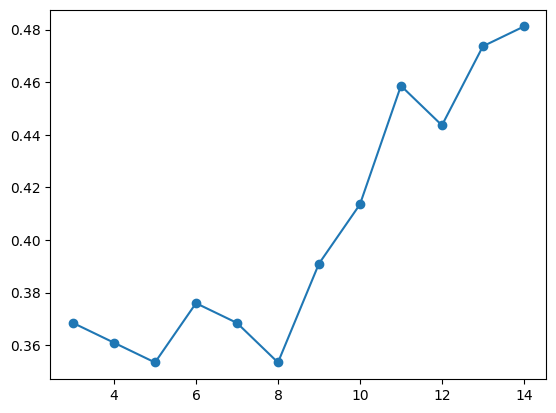

In [53]:
plt.plot(neighbors,metric_k,'o-')

In [ ]:
# its 14 have the highest accuracy

In [54]:
knn = KNeighborsClassifier(n_neighbors=14)
model = knn.fit(x1_train,y1_train)
y1_pred = model.predict(x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [55]:
print("accuracy score is:", accuracy_score(y1_test,y1_pred))

accuracy score is: 0.48120300751879697


In [65]:
from sklearn.metrics import precision_score
print(precision_score(y1_test,y1_pred,average='macro'))

0.5011720581340834


# KNN REGRESSION

In [57]:
x = df.drop('price',axis=1)
x1 = pd.DataFrame(x)
y = df['price']
y1 = pd.DataFrame(y)

In [67]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.20,random_state=42)

In [71]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

metric_k =[]

neighbors = np.arange(3,15)

for k in neighbors:
  knn = KNeighborsRegressor(n_neighbors = k)
  model = knn.fit(x1_train,y1_train)
  y1_pred = model.predict(x1_test)
  acc=mean_squared_error(y1_test,y1_pred)
  metric_k.append(acc)



In [72]:
metric_k

[0.02991181165618449,
 0.027732937295597487,
 0.027233604046652118,
 0.025477698881615538,
 0.02537008469964908,
 0.026206430219002694,
 0.02530840773069909,
 0.0266012888097634,
 0.026676405460796932,
 0.027121039312204973,
 0.027571060844073108,
 0.02848176057044279]

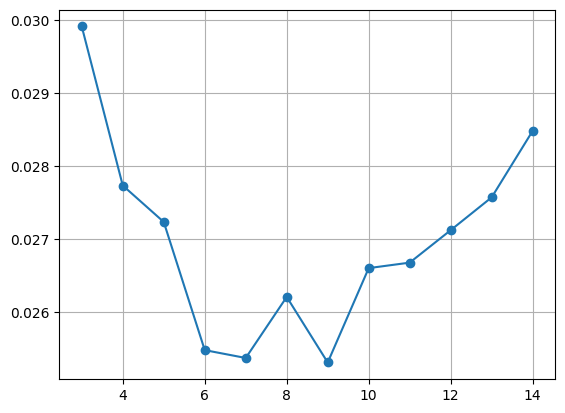

In [73]:
plt.plot(neighbors,metric_k,'o-')
plt.grid()

In [74]:
# the highest relation is at 3

knn = KNeighborsRegressor(n_neighbors=3)
model = knn.fit(x1_train,y1_train)
y1_pred = model.predict(x1_test)

In [77]:
print("mean_sqaured_error is:",mean_squared_error(y1_test,y1_pred))

mean_sqaured_error is: 0.02991181165618449


In [79]:
x.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area
0,4,1,2,1,0,1,0,0,2,0,1,0.311828
1,4,2,2,1,1,1,0,1,1,1,2,0.354839
2,3,2,4,1,0,0,0,1,2,0,0,0.491039
3,3,2,2,1,1,0,0,1,2,0,0,0.211470
4,3,2,2,1,0,0,0,1,1,1,1,0.341935


In [80]:
model.predict([[4	,1	,2	,1	,0	,1	,0	,0	,2	,0	,1	,0.311828]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([[0.38730159]])